# $k$-Moyennes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

## Chargement d'un jeux de données

Utilisation des jeux de données disponibles sous Scikit-Learn :
https://scikit-learn.org/stable/datasets/index.html

Choisissez un des jeux de données, e.g. 
    
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Visualisation
    plt.figure()
    plt.scatter(X[:,0], y[:,0], s=7, c=y)
    plt.show

78.85144142614598


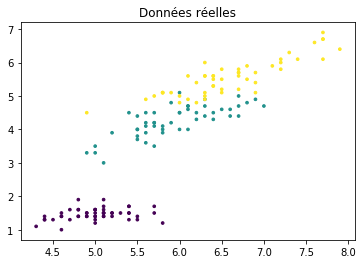

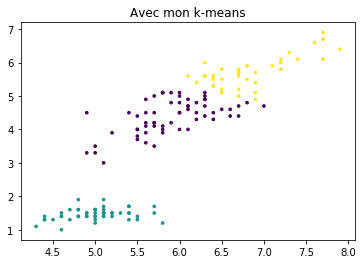

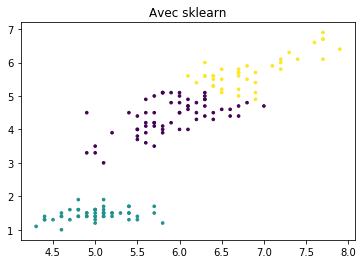

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

def init_centroides_random_points(data,nb_clusters):
    max_val = max(np.max(data, axis=0))
    min_val = min(np.min(data, axis=0))
    return np.random.uniform(min_val,max_val,(nb_clusters,data.shape[1]))

def init_centroides_equal_repartition(data,nb_clusters):
    ret = []
    step = (np.floor(len(data) / nb_clusters)).astype(int)
    for i in range(0,len(data),step):
        ret.append(data[i])
    return np.asarray(ret)

def init_centroides_random_index(data,nb_clusters):
    ret = np.zeros((nb_clusters,data.shape[1]))
    for i in range(len(ret)):
        ret[i] = data[np.random.randint(0,data.shape[0]-1)]
    return ret

def affect_clusters(data,centroides,target):
    for i in range(len(data)):
        cluster = 0
        distance = np.linalg.norm(data[i]-centroides[0])
        for j in range(1,len(centroides)):
            new_distance = np.linalg.norm(data[i]-centroides[j])
            if new_distance < distance:
                distance = new_distance
                cluster = j
        target[i] = cluster

def compute_centroides(data,centroides,target):
    for i in range(len(centroides)):
        sum_data = np.zeros(data.shape[1])
        m = 0
        for j in range(len(data)):
            if target[j] == i:
                sum_data += data[j]
                m += 1
        centroides[i] = sum_data / m
        
def compute_inertia(data,centroides,target):
    ret = 0 
    for i in range(len(centroides)):
        for j in range(len(data)):
            if target[j] == i:
                ret += np.sum((data[j] - centroides[i]) ** 2)
    return ret
        
def k_means(k_clusters_,data_,ITER_MAX_):
    target = np.zeros(len(data_))
    nbIt = 0
    centroides = init_centroides_random_index(data_,k_clusters_)
    new_centroides = []
    while not np.array_equal(centroides,new_centroides) and nbIt < ITER_MAX_:
        affect_clusters(data_,centroides,target)
        new_centroides = centroides.copy()
        compute_centroides(data_,centroides,target)
        nbIt += 1
    inertia = compute_inertia(data_,centroides,target)
    return target, inertia

def k_means_inertia(k_clusters_,data_,ITER_MAX_, n_repeat):
    target, inertia = k_means(k_clusters_,data_,ITER_MAX_)
    for i in range(1,n_repeat):
        new_target, new_inertia = k_means(k_clusters_,data_,ITER_MAX_)
        if new_inertia < inertia:
            target = new_target.copy()
            inertia = new_inertia
    return target,inertia

def k_means_find_nb_clusters(min_clusters_,max_clusters_,data_,ITER_MAX_, n_repeat):
    k = min_clusters_
    target,inertia = k_means_inertia(k,data_,ITER_MAX_,n_repeat)
    for i in range(k+1,max_clusters_+1):
        new_target, new_inertia = k_means_inertia(i,data_,ITER_MAX_,n_repeat)
        if new_inertia < inertia:
            k = i
            target = new_target.copy()
            inertia = new_inertia
    return target,k,inertia

target,inertia = k_means_inertia(3,X,200,10)
#target,k,inertia = k_means_find_nb_clusters(3,7,X,200,15)
#print(k)
print(inertia)
skMeans = KMeans(n_clusters=3,random_state=0).fit_predict(X)
# Visualisation
plt.figure(1)
plt.title("Données réelles")
plt.scatter(X[:,0], X[:,2], s=7, c=y)
plt.show()

plt.figure(2)
plt.title("Avec mon k-means")
plt.scatter(X[:,0], X[:,2], s=7, c=target)
plt.show()

plt.figure(3)
plt.title("Avec sklearn")
plt.scatter(X[:,0], X[:,2], s=7, c=skMeans)
plt.show()